In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Problem 1

In [243]:
i = 100
model = GaussianNB()
canc = datasets.load_breast_cancer()
canc_feats = canc.data[:, 0:canc.data.shape[1]-1]
canc_label = np.reshape(canc.target, (np.size(canc.target), 1))
canc_data = np.concatenate([canc_feats, canc_label], axis=1)
canc_data_n = MinMaxScaler().fit_transform(canc_data)

true_pos = np.zeros(i)
false_pos = np.zeros(i)
false_neg = np.zeros(i)
true_neg = np.zeros(i)

for n in range(i):
    np.random.seed(n)
    canc_train, canc_test = train_test_split(canc_data_n, train_size = 0.8, test_size = 0.2)

    X1 = canc_train[:, 0:canc_data.shape[1]-1]
    Y1 = canc_train[:, canc_data.shape[1]-1]
    X1_val = canc_test[:, 0:canc_data.shape[1]-1]
    Y1_val = canc_test[:, canc_data.shape[1]-1]

    model.fit(X1, Y1)
    expected = Y1
    predicted = model.predict(X1)
    print("Random Seed ", n)
    print(metrics.classification_report(expected, predicted))
    conM1 = metrics.confusion_matrix(expected, predicted)
    true_neg[n] = conM1[0, 0]
    false_neg[n] = conM1[1, 0]
    false_pos[n] = conM1[0, 1]
    true_pos[n] = conM1[1, 1]

Random Seed  0
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       165
         1.0       0.94      0.98      0.96       290

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455

Random Seed  1
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       170
         1.0       0.94      0.96      0.95       285

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455

Random Seed  2
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       167
         1.0       0.94      0.96      0.95       288

    accuracy                           0.94       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.94      

Random Seed  37
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93       172
         1.0       0.94      0.97      0.96       283

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.94       455

Random Seed  38
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       176
         1.0       0.94      0.97      0.96       279

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455

Random Seed  39
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       170
         1.0       0.94      0.98      0.96       285

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95   

Random Seed  71
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       172
         1.0       0.94      0.95      0.95       283

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.93       455
weighted avg       0.93      0.93      0.93       455

Random Seed  72
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       169
         1.0       0.95      0.96      0.95       286

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455

Random Seed  73
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       166
         1.0       0.94      0.96      0.95       289

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.93       455
weighted avg       0.94   

In [244]:
avg_true_neg = sum(true_neg)/len(true_neg)
avg_true_pos = sum(true_pos)/len(true_pos)
avg_false_neg = sum(false_neg)/len(false_neg)
avg_false_pos = sum(false_pos)/len(false_pos)
print(f"""
The Average Recall, Precision, and Accuracy over {i} Iterations:
Recall = {round(avg_true_pos/(avg_true_pos + avg_false_neg), 5)}
Precision = {round(avg_true_neg/(avg_true_neg + avg_false_pos), 5)}
Accuracy = {round((avg_true_pos + avg_true_neg) / (avg_true_pos + avg_false_neg + avg_false_pos + avg_true_neg), 5)}
""")

conM1_avg = [[avg_true_neg, avg_false_pos], [avg_false_neg, avg_true_pos]]


The Average Recall, Precision, and Accuracy over 100 Iterations:
Recall = 0.96919
Precision = 0.90041
Accuracy = 0.94354



Text(0.5, 257.44, 'Predicted Label')

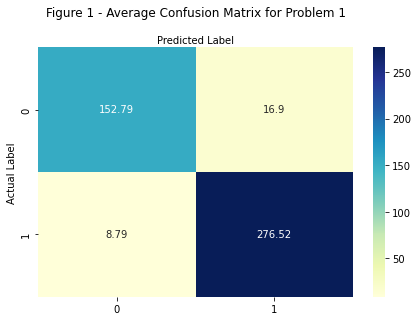

In [245]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conM1_avg), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Figure 1 - Average Confusion Matrix for Problem 1", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

# Problem 2

In [246]:
pca_data = []
pca_val = []
for n in range(1, X1.shape[1]+1):
    pca = PCA(n_components=n)
    pca_data.append(pca.fit_transform(X1))
    pca_val.append(pca.fit_transform(X1_val))
    
C = [1000, 500, 200, 100, 50, 20, 10, 5, 4, 3, 2, 1, 0.5]
max_test_acc = 0
c_max_test = 0
n_max_test = 0

for n in range(0, X1.shape[1]):
    
    for c in C:
        clf = LogisticRegression(C=c, solver='liblinear')
        clf.fit(pca_data[n], Y1)
        
        if clf.score(pca_val[n], Y1_val) > max_test_acc:
            c_max_test = c
            max_test_acc = clf.score(pca_val[n], Y1_val)
            n_max_test = n
    
        print(f"""
N = {n}
C = {c}
Training Accuracy: {clf.score(pca_data[n], Y1)}
Test Accuracy: {clf.score(pca_val[n], Y1_val)}
""")

print(f"""
Max Test Accuracy: {max_test_acc}
C: {c_max_test}
N: {n_max_test}
""")

clf = LogisticRegression(C=c_max_test, solver='liblinear')
clf.fit(pca_data[n_max_test], Y1)


N = 0
C = 1000
Training Accuracy: 0.9428571428571428
Test Accuracy: 0.9122807017543859


N = 0
C = 500
Training Accuracy: 0.9428571428571428
Test Accuracy: 0.9122807017543859


N = 0
C = 200
Training Accuracy: 0.9428571428571428
Test Accuracy: 0.9122807017543859


N = 0
C = 100
Training Accuracy: 0.9428571428571428
Test Accuracy: 0.9122807017543859


N = 0
C = 50
Training Accuracy: 0.9428571428571428
Test Accuracy: 0.9122807017543859


N = 0
C = 20
Training Accuracy: 0.9428571428571428
Test Accuracy: 0.9122807017543859


N = 0
C = 10
Training Accuracy: 0.9406593406593406
Test Accuracy: 0.9122807017543859


N = 0
C = 5
Training Accuracy: 0.9406593406593406
Test Accuracy: 0.9122807017543859


N = 0
C = 4
Training Accuracy: 0.9406593406593406
Test Accuracy: 0.9210526315789473


N = 0
C = 3
Training Accuracy: 0.9384615384615385
Test Accuracy: 0.9210526315789473


N = 0
C = 2
Training Accuracy: 0.9384615384615385
Test Accuracy: 0.9122807017543859


N = 0
C = 1
Training Accuracy: 0.94065934


N = 8
C = 50
Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9649122807017544


N = 8
C = 20
Training Accuracy: 0.9846153846153847
Test Accuracy: 0.9649122807017544


N = 8
C = 10
Training Accuracy: 0.9802197802197802
Test Accuracy: 0.9649122807017544


N = 8
C = 5
Training Accuracy: 0.9824175824175824
Test Accuracy: 0.956140350877193


N = 8
C = 4
Training Accuracy: 0.9824175824175824
Test Accuracy: 0.956140350877193


N = 8
C = 3
Training Accuracy: 0.9802197802197802
Test Accuracy: 0.956140350877193


N = 8
C = 2
Training Accuracy: 0.978021978021978
Test Accuracy: 0.956140350877193


N = 8
C = 1
Training Accuracy: 0.9692307692307692
Test Accuracy: 0.956140350877193


N = 8
C = 0.5
Training Accuracy: 0.9604395604395605
Test Accuracy: 0.9385964912280702


N = 9
C = 1000
Training Accuracy: 0.9846153846153847
Test Accuracy: 0.9473684210526315


N = 9
C = 500
Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9473684210526315


N = 9
C = 200
Training Accuracy: 0.98681318681318


N = 15
C = 0.5
Training Accuracy: 0.9626373626373627
Test Accuracy: 0.9385964912280702


N = 16
C = 1000
Training Accuracy: 0.9912087912087912
Test Accuracy: 0.8947368421052632


N = 16
C = 500
Training Accuracy: 0.9912087912087912
Test Accuracy: 0.8947368421052632


N = 16
C = 200
Training Accuracy: 0.9934065934065934
Test Accuracy: 0.9122807017543859


N = 16
C = 100
Training Accuracy: 0.9934065934065934
Test Accuracy: 0.9298245614035088


N = 16
C = 50
Training Accuracy: 0.9912087912087912
Test Accuracy: 0.9473684210526315


N = 16
C = 20
Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9385964912280702


N = 16
C = 10
Training Accuracy: 0.9802197802197802
Test Accuracy: 0.9473684210526315


N = 16
C = 5
Training Accuracy: 0.9802197802197802
Test Accuracy: 0.956140350877193


N = 16
C = 4
Training Accuracy: 0.9802197802197802
Test Accuracy: 0.956140350877193


N = 16
C = 3
Training Accuracy: 0.978021978021978
Test Accuracy: 0.956140350877193


N = 16
C = 2
Training Accuracy: 


N = 28
C = 3
Training Accuracy: 0.978021978021978
Test Accuracy: 0.956140350877193


N = 28
C = 2
Training Accuracy: 0.978021978021978
Test Accuracy: 0.956140350877193


N = 28
C = 1
Training Accuracy: 0.9692307692307692
Test Accuracy: 0.956140350877193


N = 28
C = 0.5
Training Accuracy: 0.9626373626373627
Test Accuracy: 0.9385964912280702


Max Test Accuracy: 0.9649122807017544
C: 2
N: 4



LogisticRegression(C=2, solver='liblinear')

In [247]:
conM2 = []
for n in range(0, X1.shape[1]):
    clf = LogisticRegression(C=c_max_test, solver='liblinear')
    clf.fit(pca_data[n], Y1)
    predicted = clf.predict(pca_val[n])
    conM2.append(confusion_matrix(Y1_val, predicted))
    report = classification_report(Y1_val, predicted)
    print(f"""
K = {n+1}
{report}
""")


K = 1
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86        38
         1.0       0.91      0.96      0.94        76

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



K = 2
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89        38
         1.0       0.94      0.96      0.95        76

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



K = 3
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        38
         1.0       0.96      0.96      0.96        76

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       1

In [248]:
def accuracy(M):
    true_neg = M[0, 0]
    false_neg = M[1, 0]
    false_pos = M[0, 1]
    true_pos = M[1, 1]
    return (true_pos + true_neg) / (true_pos + false_neg + false_pos + true_neg)

def precision(M):
    true_neg = M[0, 0]
    false_neg = M[1, 0]
    false_pos = M[0, 1]
    true_pos = M[1, 1]
    return true_neg/(true_neg + false_pos)

def recall(M):
    true_neg = M[0, 0]
    false_neg = M[1, 0]
    false_pos = M[0, 1]
    true_pos = M[1, 1]
    return true_pos/(true_pos + false_neg)

In [249]:
M2_acc = []
M2_pre = []
M2_rec = []

for n in range(0, X1.shape[1]):
    M2_acc.append(accuracy(conM2[n]))
    M2_pre.append(precision(conM2[n]))
    M2_rec.append(recall(conM2[n]))

Text(0.5, 257.44, 'Predicted Label')

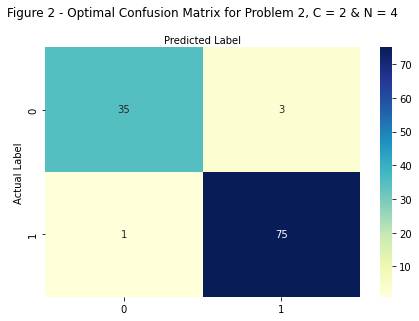

In [250]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conM2[n_max_test]), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Figure 2 - Optimal Confusion Matrix for Problem 2, C = 2 & N = 4", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

Text(0.5, 1.0, 'Figure 3 - Accuracy, Precision, and Recall for Problem 2 for Various K')

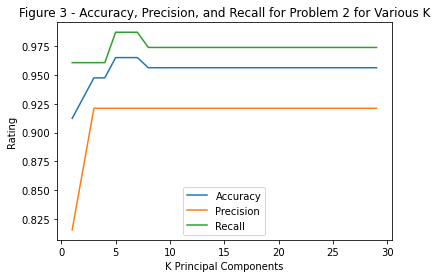

In [255]:
xx = range(1, X1.shape[1]+1)
plot1 = plt.figure(1)
plt.plot(xx, M2_acc)
plt.plot(xx, M2_pre)
plt.plot(xx, M2_rec)
plt.legend(['Accuracy', 'Precision', 'Recall'], loc='lower center')
plt.xlabel('K Principal Components')
plt.ylabel('Rating')
plt.title("Figure 3 - Accuracy, Precision, and Recall for Problem 2 for Various K")

# Problem 3

In [252]:
conM3 = []
for n in range(0, X1.shape[1]):
    model.fit(pca_data[n], Y1)
    expected = Y1
    predicted = model.predict(pca_data[n])
    print('K =' , n+1)
    print(metrics.classification_report(expected, predicted))
    conM3.append(metrics.confusion_matrix(expected, predicted))

K = 1
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92       174
         1.0       0.95      0.96      0.95       281

    accuracy                           0.94       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.94      0.94      0.94       455

K = 2
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       174
         1.0       0.95      0.95      0.95       281

    accuracy                           0.94       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455

K = 3
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       174
         1.0       0.95      0.95      0.95       281

    accuracy                           0.94       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.94      0.94      0.94       455

K

In [253]:
M3_acc = []
M3_pre = []
M3_rec = []

for n in range(0, X1.shape[1]):
    M3_acc.append(accuracy(conM3[n]))
    M3_pre.append(precision(conM3[n]))
    M3_rec.append(recall(conM3[n]))

Text(0.5, 1.0, 'Figure 4 - Accuracy, Precision, and Recall for Problem 3 for Various K')

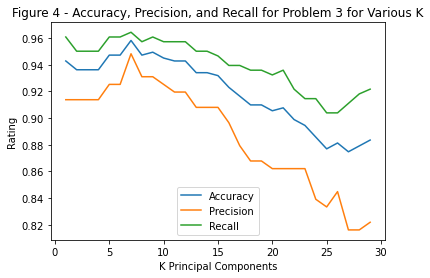

In [254]:
xx = range(1, X1.shape[1]+1)
plot1 = plt.figure(1)
plt.plot(xx, M3_acc)
plt.plot(xx, M3_pre)
plt.plot(xx, M3_rec)
plt.legend(['Accuracy', 'Precision', 'Recall'], loc='lower center')
plt.xlabel('K Principal Components')
plt.ylabel('Rating')
plt.title("Figure 4 - Accuracy, Precision, and Recall for Problem 3 for Various K")